# Import Library

In [1]:
#@title Import Pandas Numpy Seaborn dan Matplotlib

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
#@title Import datetime re dan string

import datetime as dt
import re
import string

In [3]:
#@title Import WordCloud

from wordcloud import WordCloud

In [4]:
#@title Import NLTK

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
#@title Import Sastrawi

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [6]:
#@title Import CSV Request dan IO

import csv
import requests
from io import StringIO

In [7]:
#@title Install Gensim

!pip install gensim

In [8]:
#@title Import Model Gensim dan Library Tensorflow

from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
#@title Import Library Files

from google.colab import files

# Dataset

In [10]:
#@title Membaca Dataset

read_df = pd.read_csv('/content/ulasan_dana_bersih.csv')
read_df

,reviewId,userName,content,score,at
0,fff49d24-40df-4446-99f3-483f2c291035,Pengguna Google,bagus,5,2025-10-25 14:32:13
1,7436691b-eebd-4298-8ace-21cbcbe66be2,Pengguna Google,gak jelas fitur dana cicil g keluar di HP saya...,1,2025-10-25 14:31:33
2,35f7bf97-6a7d-4932-af9e-f44f2d56f711,Pengguna Google,sangat membantu,5,2025-10-25 14:29:54
3,1643a4ce-6ca3-4421-909c-8b57670d7664,Pengguna Google,susah loading bisku,2,2025-10-25 14:29:11
4,bf0559f5-4246-46d2-8e8e-28e65dcbc80c,Pengguna Google,top up e-money sukses tapi saldonya gak masuk....,1,2025-10-25 14:27:33
...,...,...,...,...,...
13423,1f16092e-20cb-4951-81f9-ce6d59ca53d8,Efa Offic,"dana sekarang mempersulit ya,beda waktu dulu h...",1,2025-10-03 01:57:29
13424,de129573-7dcf-4781-9ce0-33e66529141a,Galih Galih,uang saya ke transfer sendirinya senilai 498.3...,1,2025-10-03 01:56:48
13425,34920c90-6a44-4d6b-a934-488ecb9b1cbf,Irfan Andi,saya suka sekali dengan aplikasi dana mudah me...,5,2025-10-03 01:56:25
13426,2e010fb0-3de9-443d-b1b1-1303105dbcc4,indriani Yani,"mau bayar cicilan, malah tulisannya memproses ...",2,2025-10-03 01:47:47


In [11]:
#@title Memeriksa apakah ada NULL

read_df.isnull().sum()

,0
reviewId,0
userName,0
content,0
score,0
at,0


In [12]:
#@title Drop Column `ReviewId` dan `UserName`

read_df = read_df.drop(columns=['reviewId', 'userName'])

In [13]:
#@title Info Dataset

read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  13428 non-null  object
 1   score    13428 non-null  int64 
 2   at       13428 non-null  object
dtypes: int64(1), object(2)
memory usage: 314.8+ KB


In [14]:
#@title Membaca 5 Baris Pertama

read_df.head()

,content,score,at
0,bagus,5,2025-10-25 14:32:13
1,gak jelas fitur dana cicil g keluar di HP saya...,1,2025-10-25 14:31:33
2,sangat membantu,5,2025-10-25 14:29:54
3,susah loading bisku,2,2025-10-25 14:29:11
4,top up e-money sukses tapi saldonya gak masuk....,1,2025-10-25 14:27:33


# Preprocessing

In [15]:
preprocessing_df = read_df.copy()

In [16]:
#@title Cleaning Text
def cleaningText(text):
    if isinstance(text, str):
        text = str(text)
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        text = re.sub(r'#[A-Za-z0-9]+', '', text)
        text = re.sub(r'RT[\s]', '', text)
        text = re.sub(r"http\S+", '', text)
        text = re.sub(r'[0-9]+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = text.replace('\n', ' ')
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.strip(' ')
        text = text.lower()
        return text
    return ''

preprocessing_df['content'] = preprocessing_df['content'].apply(cleaningText)
preprocessing_df['content'].head()

,content
0,bagus
1,gak jelas fitur dana cicil g keluar di hp saya...
2,sangat membantu
3,susah loading bisku
4,top up emoney sukses tapi saldonya gak masuk k...


In [17]:
#@title Casefolding Text
def casefoldingText(text):
  text = text.lower()
  return text

preprocessing_df['content'] = preprocessing_df['content'].apply(casefoldingText)
preprocessing_df['content'].head()

,content
0,bagus
1,gak jelas fitur dana cicil g keluar di hp saya...
2,sangat membantu
3,susah loading bisku
4,top up emoney sukses tapi saldonya gak masuk k...


In [18]:
#@title Memasukkan Kamus, Menghapus, dan Mengganti Slang Word

kbba = pd.read_csv('/content/kbba.txt', sep='\t')
kbba = dict(zip(kbba['7an'], kbba['tujuan']))

slang = pd.read_csv('/content/slangword.txt', sep=':', header=None, names=['slang', 'arti'])
slang = dict(zip(slang['slang'], slang['arti']))

formal = pd.read_csv('/content/formalizationDict.txt', sep='\t')
formal = dict(zip(formal['7an'], formal['tujuan']))

# Menggabungkan seluruh kamus menjadi satu
combined = {**kbba,
            **slang,
            **formal
            }

# Fungsi untuk mengganti kata slang dengan kata formal
def normalize_slang(text):
    cleaned_words = []
    for token in text.split():
        key = token.lower()
        if key in combined:
            cleaned_words.append(combined[key])
        else:
            cleaned_words.append(token)
    return ' '.join(cleaned_words)

# Menerapkan fungsi ke kolom teks dan Melihat hasil
preprocessing_df['content'] = preprocessing_df['content'].apply(normalize_slang)
preprocessing_df['content'].head()


,content
0,bagus
1,tidak jelas fitur dana cicil tidak keluar di h...
2,sangat membantu
3,susah loading bisku
4,top up emoney sukses tapi saldonya tidak masuk...


In [19]:
#@title Tokenizing Text
def tokenizingText(text):
    return word_tokenize(text)

preprocessing_df['content'] = preprocessing_df['content'].apply(tokenizingText)
preprocessing_df['content'].head()

,content
0,[bagus]
1,"[tidak, jelas, fitur, dana, cicil, tidak, kelu..."
2,"[sangat, membantu]"
3,"[susah, loading, bisku]"
4,"[top, up, emoney, sukses, tapi, saldonya, tida..."


In [20]:
#@title Menghapus Stopwords dari Teks

default_stopwords = set(StopWordRemoverFactory().get_stop_words())

with open('/content/stopword.txt', encoding='utf-8') as file:
    extra_stopwords = {line.strip() for line in file if line.strip()}

all_stopwords = default_stopwords | extra_stopwords

def clean_stopwords(token_list):
    return [token for token in token_list if token not in all_stopwords]

preprocessing_df['content'] = preprocessing_df['content'].apply(clean_stopwords)
preprocessing_df['content'].head()

,content
0,[bagus]
1,"[jelas, fitur, dana, cicil, keluar, hp, bulann..."
2,[membantu]
3,"[susah, loading, bisku]"
4,"[top, up, emoney, sukses, saldonya, masuk, alf..."


In [21]:
# Inisialisasi stemmer dari Sastrawi
stem_factory = StemmerFactory()
indo_stemmer = stem_factory.create_stemmer()

# Fungsi untuk melakukan stemming pada setiap token
def apply_stemming(token_list):
    if not isinstance(token_list, list):
        token_list = str(token_list).split()
    hasil = [indo_stemmer.stem(token) for token in token_list]
    return hasil

preprocessing_df['content'] = preprocessing_df['content'].apply(apply_stemming)
preprocessing_df['content'].head()

,content
0,[bagus]
1,"[jelas, fitur, dana, cicil, keluar, hp, bulan,..."
2,[bantu]
3,"[susah, loading, bis]"
4,"[top, up, emoney, sukses, saldo, masuk, alfaxx..."


In [22]:
#@title To Sentence List Words
def toSentence(list_words):
    return ' '.join(word for word in list_words)

preprocessing_df['content'] = preprocessing_df['content'].apply(toSentence)
preprocessing_df['content'].head()

,content
0,bagus
1,jelas fitur dana cicil keluar hp bulan habis u...
2,bantu
3,susah loading bis
4,top up emoney sukses saldo masuk alfaxxx indom...


In [23]:
preprocessing_df.to_csv('/content/preprocessing_done.csv', index=False, encoding='utf-8')
print("✅ Hasil stemming disimpan ke file preprocessing_done.csv")

✅ Hasil stemming disimpan ke file preprocessing_done.csv


In [24]:
preprocessing_df.sample(10)

,content,score,at
5685,apk andal masak akun hilang hp kartu balek ada...,1,2025-10-16 12:59:55
5636,baik,5,2025-10-16 14:00:00
3803,puas,5,2025-10-19 13:58:09
9533,uang hilang ribu ditf brimo masuk dana saldo b...,1,2025-10-10 05:22:45
6916,saldo banyakbisa terima mengirimkenapaselama a...,5,2025-10-14 12:10:14
7313,bagus cepat,4,2025-10-13 18:06:50
10892,aplikasi nya kesini ribet yahh masuk akun prib...,1,2025-10-07 13:45:38
12799,balik kin akun masa masuk akun akun saldo nya ...,1,2025-10-04 04:52:31
12282,montak,5,2025-10-05 03:32:37
12376,mudah transaksi gratis admin semua bank,5,2025-10-04 22:19:58


# Labeling Data

In [25]:
labeling_df = preprocessing_df

In [26]:
labeling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  13428 non-null  object
 1   score    13428 non-null  int64 
 2   at       13428 non-null  object
dtypes: int64(1), object(2)
memory usage: 314.8+ KB


In [27]:
# Membaca kata positif
file_pos = open('/content/positive.txt', 'r', encoding='utf-8')
daftar_positif = {line.strip().lower() for line in file_pos if line.strip()}
file_pos.close()

# Membaca kata negatif
file_neg = open('/content/negative.txt', 'r', encoding='utf-8')
daftar_negatif = {line.strip().lower() for line in file_neg if line.strip()}
file_neg.close()

#@title Fungsi untuk Menentukan Sentimen Berdasarkan Lexicon
def deteksi_sentimen(teks):
    token = teks.split()  # pecah teks menjadi kata
    jumlah_pos = sum(1 for kata in token if kata in daftar_positif)
    jumlah_neg = sum(1 for kata in token if kata in daftar_negatif)

    if jumlah_pos > jumlah_neg:
        hasil = 'positif'
    elif jumlah_neg > jumlah_pos:
        hasil = 'negatif'
    else:
        hasil = 'netral'

    return hasil

# Menambahkan Kolom Sentimen ke Dataset
labeling_df['sentiment'] = labeling_df['content'].apply(deteksi_sentimen)
labeling_df.head()

,content,score,at,sentiment
0,bagus,5,2025-10-25 14:32:13,positif
1,jelas fitur dana cicil keluar hp bulan habis u...,1,2025-10-25 14:31:33,negatif
2,bantu,5,2025-10-25 14:29:54,netral
3,susah loading bis,2,2025-10-25 14:29:11,negatif
4,top up emoney sukses saldo masuk alfaxxx indom...,1,2025-10-25 14:27:33,positif


In [28]:
# Mengecek Jumlah Data
labeling_df['sentiment'].value_counts()

,count
sentiment,
netral,6619
positif,3953
negatif,2856


In [29]:
labeling_df.isnull().sum()

,0
content,0
score,0
at,0
sentiment,0


# Modelling

In [30]:
import warnings
warnings.filterwarnings('ignore')

## Persiapan Data

In [31]:
# ============================================================================
# PERSIAPAN DATA
# ============================================================================

print("="*80)
print("PERSIAPAN DATA")
print("="*80)

# Menyiapkan data X dan y
X = labeling_df['content'].values
y = labeling_df['sentiment'].values

print(f"Total data: {len(X)}")
print(f"Distribusi label:\n{labeling_df['sentiment'].value_counts()}")

# Encode label menjadi numerik
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nMapping label:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")


PERSIAPAN DATA
Total data: 13428
Distribusi label:
sentiment
netral     6619
positif    3953
negatif    2856
Name: count, dtype: int64

Mapping label:
negatif -> 0
netral -> 1
positif -> 2


## **SKEMA 1**: **BiLSTM** + **Word2Vec** + **80/20 Split**

In [32]:
print("\n" + "="*80)
print("SKEMA 1: BiLSTM + Word2Vec Embeddings + Split 80/20")
print("="*80)

#@title Split data 80/20
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Data training: {len(X_train_1)}")
print(f"Data testing: {len(X_test_1)}")


SKEMA 1: BiLSTM + Word2Vec Embeddings + Split 80/20
Data training: 10742
Data testing: 2686


In [33]:
#@title Tokenisasi untuk model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 100

tokenizer_1 = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer_1.fit_on_texts(X_train_1)

X_train_seq_1 = tokenizer_1.texts_to_sequences(X_train_1)
X_test_seq_1 = tokenizer_1.texts_to_sequences(X_test_1)

X_train_pad_1 = pad_sequences(X_train_seq_1, maxlen=max_len, padding='post', truncating='post')
X_test_pad_1 = pad_sequences(X_test_seq_1, maxlen=max_len, padding='post', truncating='post')

print(f"Shape X_train: {X_train_pad_1.shape}")
print(f"Shape X_test: {X_test_pad_1.shape}")

Shape X_train: (10742, 100)
Shape X_test: (2686, 100)


In [34]:
#@title Membuat Word2Vec embeddings
from gensim.models import Word2Vec

In [35]:
#@title Tokenisasi untuk Word2Vec
tokenized_texts = [text.split() for text in X_train_1]

In [36]:
#@title Training Word2Vec
w2v_model_1 = Word2Vec(
    sentences=tokenized_texts,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    epochs=10,
    seed=42
)

print(f"Word2Vec vocabulary size: {len(w2v_model_1.wv)}")

Word2Vec vocabulary size: 8364


In [37]:
#@title Membuat embedding matrix
embedding_dim = 100
embedding_matrix_1 = np.zeros((max_words, embedding_dim))

for word, idx in tokenizer_1.word_index.items():
    if idx < max_words:
        try:
            embedding_matrix_1[idx] = w2v_model_1.wv[word]
        except KeyError:
            embedding_matrix_1[idx] = np.random.normal(0, 0.1, embedding_dim)

print(f"Embedding matrix shape: {embedding_matrix_1.shape}")

Embedding matrix shape: (5000, 100)


In [38]:
#@title Membuat model BiLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_1 = Sequential([
    Embedding(max_words, embedding_dim, weights=[embedding_matrix_1],
              input_length=max_len, trainable=True),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Summary:")
model_1.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 500,000 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#@title Training model
early_stop_1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_1 = model_1.fit(
    X_train_pad_1, y_train_1,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop_1],
    verbose=1
)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 550ms/step - accuracy: 0.5798 - loss: 0.9011 - val_accuracy: 0.7185 - val_loss: 0.6268
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 75s 556ms/step - accuracy: 0.7462 - loss: 0.5767 - val_accuracy: 0.8385 - val_loss: 0.4134
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 77s 568ms/step - accuracy: 0.8732 - loss: 0.3177 - val_accuracy: 0.8595 - val_loss: 0.3461
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 74s 548ms/step - accuracy: 0.9382 - loss: 0.1718 - val_accuracy: 0.9209 - val_loss: 0.2313
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 91s 619ms/step - accuracy: 0.9726 - loss: 0.0938 - val_accuracy: 0.9344 - val_loss: 0.2500
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 628ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.8790 - val_loss: 0.3824
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 80s 592ms/step - accuracy: 0.9518 - loss: 0.1272 - val_accuracy: 0.9409 - val_loss: 0.2089
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 78s 560ms/step - accuracy: 0.9905 - loss: 0

In [40]:
#@title Evaluasi
train_loss_1, train_acc_1 = model_1.evaluate(X_train_pad_1, y_train_1, verbose=0)
test_loss_1, test_acc_1 = model_1.evaluate(X_test_pad_1, y_test_1, verbose=0)

print(f"\n{'='*50}")
print(f"HASIL SKEMA 1:")
print(f"Training Accuracy: {train_acc_1*100:.2f}%")
print(f"Testing Accuracy: {test_acc_1*100:.2f}%")
print(f"{'='*50}")


HASIL SKEMA 1:
Training Accuracy: 98.27%
Testing Accuracy: 95.09%


## **SKEMA 2**: **BiLSTM** + **TF-IDF Embeddings** + **80/20 Split**

In [41]:
print("\n" + "="*80)
print("SKEMA 2: BiLSTM + TF-IDF Embeddings + Split 80/20")
print("="*80)

#@title Menggunakan split yang sama
X_train_2, X_test_2 = X_train_1, X_test_1
y_train_2, y_test_2 = y_train_1, y_test_1


SKEMA 2: BiLSTM + TF-IDF Embeddings + Split 80/20


In [42]:
# ============================================================================
# 3. SKEMA 2: BiLSTM + TF-IDF Embeddings + 80/20 Split
# ============================================================================

#@title TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_2)
X_test_tfidf = tfidf_vectorizer.transform(X_test_2)

In [43]:
#@title Convert to dense array dan reshape untuk LSTM
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [44]:
#@title Reshape untuk LSTM input (samples, timesteps, features)
# Kita akan membagi features menjadi timesteps

timesteps = 50
features_per_step = 100

X_train_reshaped = X_train_tfidf_dense[:, :timesteps*features_per_step].reshape(-1, timesteps, features_per_step)
X_test_reshaped = X_test_tfidf_dense[:, :timesteps*features_per_step].reshape(-1, timesteps, features_per_step)

print(f"Shape X_train: {X_train_reshaped.shape}")
print(f"Shape X_test: {X_test_reshaped.shape}")

Shape X_train: (10742, 50, 100)
Shape X_test: (2686, 50, 100)


In [45]:
#@title Membuat model BiLSTM untuk TF-IDF
model_2 = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(timesteps, features_per_step)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Summary:")
model_2.summary()


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 50, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,299 (1.55 MB)

 Trainable params: 407,299 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#@title Training model
early_stop_2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_2 = model_2.fit(
    X_train_reshaped, y_train_2,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop_2],
    verbose=1
)


Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - accuracy: 0.5010 - loss: 1.0360 - val_accuracy: 0.6380 - val_loss: 0.7999
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.6794 - loss: 0.7361 - val_accuracy: 0.7506 - val_loss: 0.5831
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.7541 - loss: 0.5868 - val_accuracy: 0.7901 - val_loss: 0.5393
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.7888 - loss: 0.5267 - val_accuracy: 0.7804 - val_loss: 0.5488
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 33s 243ms/step - accuracy: 0.8018 - loss: 0.4871 - val_accuracy: 0.7832 - val_loss: 0.5308
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 33s 248ms/step - accuracy: 0.8198 - loss: 0.4501 - val_accuracy: 0.7794 - val_loss: 0.5426
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 33s 246ms/step - accuracy: 0.8276 - loss: 0.4430 - val_accuracy: 0.8218 - val_loss: 0.4608
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 33s 244ms/step - accuracy: 0.8291 - loss: 0

In [47]:
#@title Evaluasi
train_loss_2, train_acc_2 = model_2.evaluate(X_train_reshaped, y_train_2, verbose=0)
test_loss_2, test_acc_2 = model_2.evaluate(X_test_reshaped, y_test_2, verbose=0)

print(f"\n{'='*50}")
print(f"HASIL SKEMA 2:")
print(f"Training Accuracy: {train_acc_2*100:.2f}%")
print(f"Testing Accuracy: {test_acc_2*100:.2f}%")
print(f"{'='*50}")


HASIL SKEMA 2:
Training Accuracy: 86.41%
Testing Accuracy: 84.51%


## **SKEMA 3**: **BiLSTM** + **Word2Vec** + **70/30 Split**

In [48]:
# ============================================================================
# 4. SKEMA 3: BiLSTM + Word2Vec + 70/30 Split
# ============================================================================

print("\n" + "="*80)
print("SKEMA 3: BiLSTM + Word2Vec Embeddings + Split 70/30")
print("="*80)

#@title Split data 70/30
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Data training: {len(X_train_3)}")
print(f"Data testing: {len(X_test_3)}")


SKEMA 3: BiLSTM + Word2Vec Embeddings + Split 70/30
Data training: 9399
Data testing: 4029


In [49]:
#@title Tokenisasi
tokenizer_3 = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer_3.fit_on_texts(X_train_3)

X_train_seq_3 = tokenizer_3.texts_to_sequences(X_train_3)
X_test_seq_3 = tokenizer_3.texts_to_sequences(X_test_3)

X_train_pad_3 = pad_sequences(X_train_seq_3, maxlen=max_len, padding='post', truncating='post')
X_test_pad_3 = pad_sequences(X_test_seq_3, maxlen=max_len, padding='post', truncating='post')

In [50]:
#@title Membuat Word2Vec embeddings
tokenized_texts_3 = [text.split() for text in X_train_3]

w2v_model_3 = Word2Vec(
    sentences=tokenized_texts_3,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    epochs=10,
    seed=42
)

In [51]:
#@title Membuat embedding matrix
embedding_matrix_3 = np.zeros((max_words, embedding_dim))

for word, idx in tokenizer_3.word_index.items():
    if idx < max_words:
        try:
            embedding_matrix_3[idx] = w2v_model_3.wv[word]
        except KeyError:
            embedding_matrix_3[idx] = np.random.normal(0, 0.1, embedding_dim)

In [52]:
#@title Membuat model BiLSTM dengan arsitektur berbeda
model_3 = Sequential([
    Embedding(max_words, embedding_dim, weights=[embedding_matrix_3],
              input_length=max_len, trainable=True),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Summary:")
model_3.summary()


Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 500,000 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#@title Training model
early_stop_3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_3 = model_3.fit(
    X_train_pad_3, y_train_3,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop_3],
    verbose=1
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 243ms/step - accuracy: 0.4895 - loss: 0.9991 - val_accuracy: 0.6910 - val_loss: 0.7148
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.6910 - loss: 0.7234 - val_accuracy: 0.7367 - val_loss: 0.5783
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 228ms/step - accuracy: 0.7417 - loss: 0.5899 - val_accuracy: 0.7931 - val_loss: 0.4891
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.7287 - loss: 0.6503 - val_accuracy: 0.8005 - val_loss: 0.4696
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 240ms/step - accuracy: 0.8618 - loss: 0.3831 - val_accuracy: 0.8580 - val_loss: 0.3917
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9115 - loss: 0.2566 - val_accuracy: 0.9048 - val_loss: 0.2612
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.9427 - loss: 0.1815 - val_accuracy: 0.9207 - val_loss: 0.2526
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 240ms/step - accuracy: 0.9654 - loss: 0

In [54]:
#@title Evaluasi
train_loss_3, train_acc_3 = model_3.evaluate(X_train_pad_3, y_train_3, verbose=0)
test_loss_3, test_acc_3 = model_3.evaluate(X_test_pad_3, y_test_3, verbose=0)

print(f"\n{'='*50}")
print(f"HASIL SKEMA 3:")
print(f"Training Accuracy: {train_acc_3*100:.2f}%")
print(f"Testing Accuracy: {test_acc_3*100:.2f}%")
print(f"{'='*50}")


HASIL SKEMA 3:
Training Accuracy: 97.66%
Testing Accuracy: 93.92%


## **RINGKASAN HASIL** SEMUA SKEMA

In [55]:
print("\n" + "="*80)
print("RINGKASAN HASIL SEMUA SKEMA PELATIHAN")
print("="*80)

results_summary = pd.DataFrame({
    'Skema': ['Skema 1', 'Skema 2', 'Skema 3'],
    'Algoritma': ['BiLSTM', 'BiLSTM', 'BiLSTM'],
    'Ekstraksi Fitur': ['Word2Vec', 'TF-IDF', 'Word2Vec'],
    'Split Data': ['80/20', '80/20', '70/30'],
    'Training Accuracy (%)': [train_acc_1*100, train_acc_2*100, train_acc_3*100],
    'Testing Accuracy (%)': [test_acc_1*100, test_acc_2*100, test_acc_3*100]
})

print(results_summary.to_string(index=False))


RINGKASAN HASIL SEMUA SKEMA PELATIHAN
  Skema Algoritma Ekstraksi Fitur Split Data  Training Accuracy (%)  Testing Accuracy (%)
Skema 1    BiLSTM        Word2Vec      80/20              98.268479             95.085627
Skema 2    BiLSTM          TF-IDF      80/20              86.408490             84.512287
Skema 3    BiLSTM        Word2Vec      70/30              97.659326             93.919086


In [56]:
#@title Menentukan model terbaik
best_idx = np.argmax([test_acc_1, test_acc_2, test_acc_3])
best_models = [model_1, model_2, model_3]
best_model = best_models[best_idx]

print(f"\n{'='*50}")
print(f"MODEL TERBAIK: Skema {best_idx + 1}")
print(f"Testing Accuracy: {[test_acc_1, test_acc_2, test_acc_3][best_idx]*100:.2f}%")
print(f"{'='*50}")


MODEL TERBAIK: Skema 1
Testing Accuracy: 95.09%


## **VISUALISASI HASIL** TRAINING


VISUALISASI HASIL TRAINING


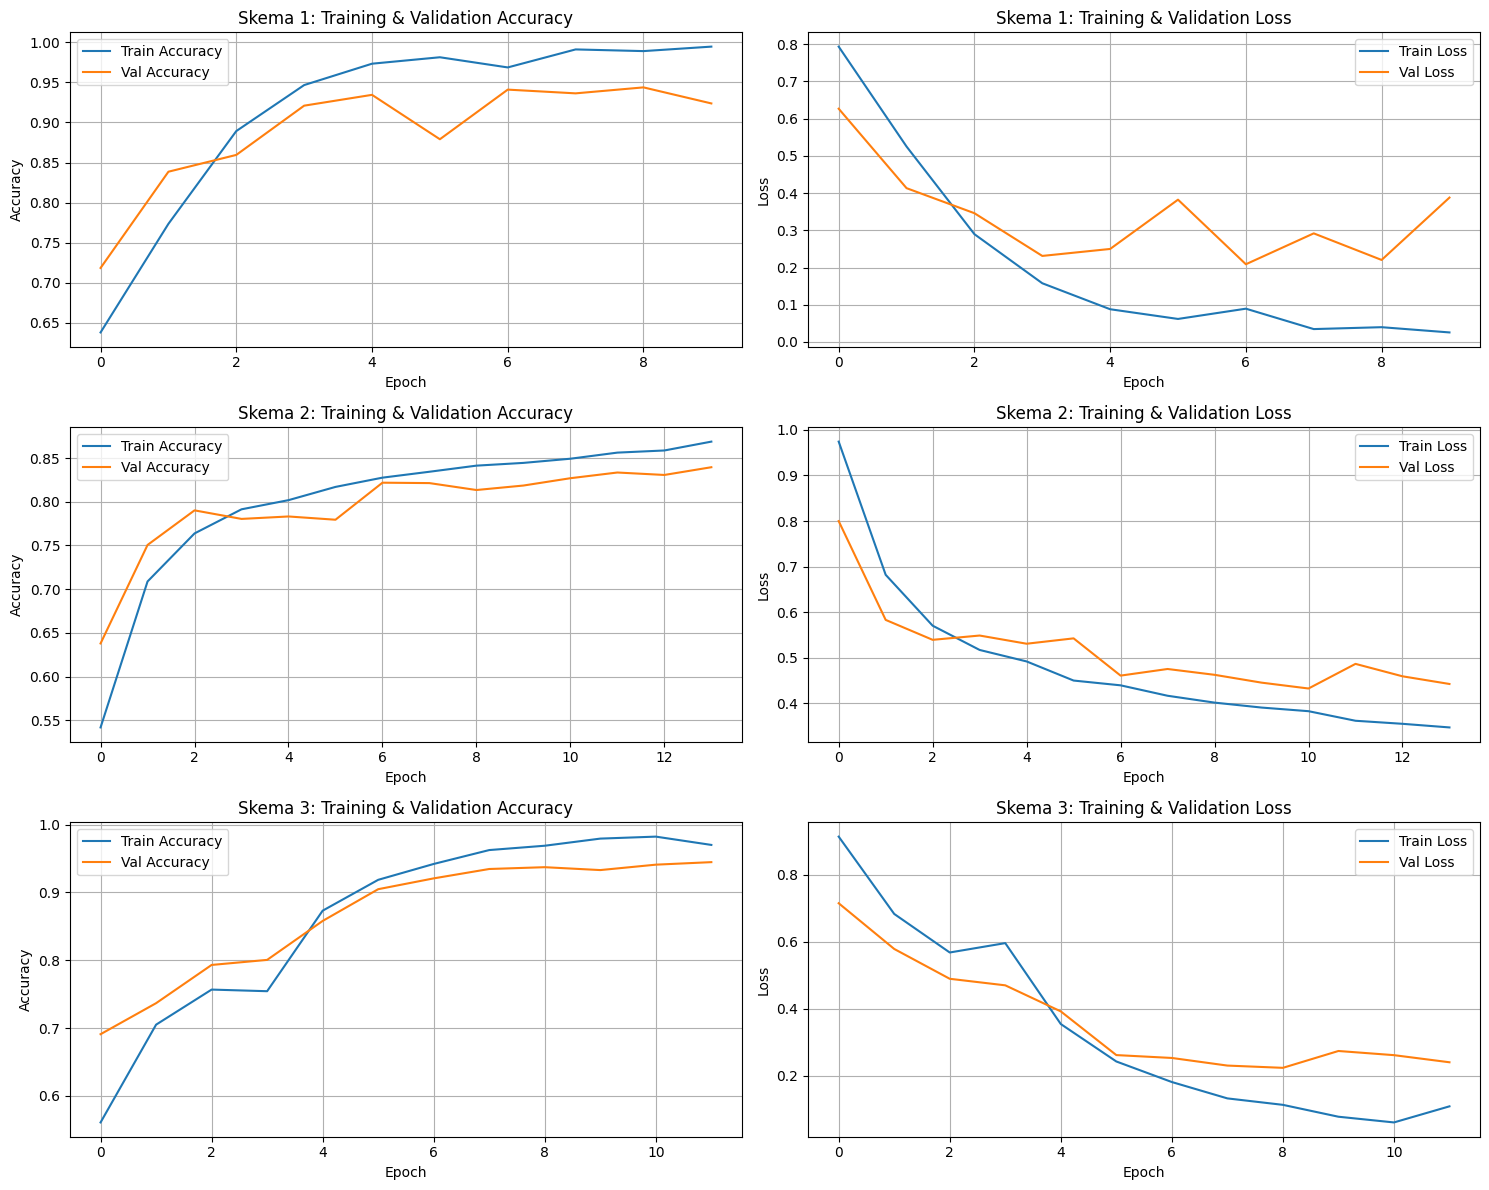

✅ Grafik training history disimpan ke 'training_history.png'


In [57]:
print("\n" + "="*80)
print("VISUALISASI HASIL TRAINING")
print("="*80)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Skema 1
axes[0, 0].plot(history_1.history['accuracy'], label='Train Accuracy')
axes[0, 0].plot(history_1.history['val_accuracy'], label='Val Accuracy')
axes[0, 0].set_title('Skema 1: Training & Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(history_1.history['loss'], label='Train Loss')
axes[0, 1].plot(history_1.history['val_loss'], label='Val Loss')
axes[0, 1].set_title('Skema 1: Training & Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Skema 2
axes[1, 0].plot(history_2.history['accuracy'], label='Train Accuracy')
axes[1, 0].plot(history_2.history['val_accuracy'], label='Val Accuracy')
axes[1, 0].set_title('Skema 2: Training & Validation Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(history_2.history['loss'], label='Train Loss')
axes[1, 1].plot(history_2.history['val_loss'], label='Val Loss')
axes[1, 1].set_title('Skema 2: Training & Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Skema 3
axes[2, 0].plot(history_3.history['accuracy'], label='Train Accuracy')
axes[2, 0].plot(history_3.history['val_accuracy'], label='Val Accuracy')
axes[2, 0].set_title('Skema 3: Training & Validation Accuracy')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Accuracy')
axes[2, 0].legend()
axes[2, 0].grid(True)

axes[2, 1].plot(history_3.history['loss'], label='Train Loss')
axes[2, 1].plot(history_3.history['val_loss'], label='Val Loss')
axes[2, 1].set_title('Skema 3: Training & Validation Loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()
axes[2, 1].grid(True)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Grafik training history disimpan ke 'training_history.png'")

## **CONFUSION MATRIX** UNTUK **MODEL TERBAIK**

In [68]:
# ============================================================================
# 7. CONFUSION MATRIX UNTUK MODEL TERBAIK
# ============================================================================

print("\n" + "="*80)
print("CONFUSION MATRIX - MODEL TERBAIK")
print("="*80)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


CONFUSION MATRIX - MODEL TERBAIK


In [59]:
#@title Pilih data test sesuai skema terbaik

if best_idx == 0:
    X_test_best = X_test_pad_1
    y_test_best = y_test_1
elif best_idx == 1:
    X_test_best = X_test_reshaped
    y_test_best = y_test_2
else:
    X_test_best = X_test_pad_3
    y_test_best = y_test_3

In [60]:
#@title Prediksi

y_pred_best = best_model.predict(X_test_best)
y_pred_classes = np.argmax(y_pred_best, axis=1)

84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step


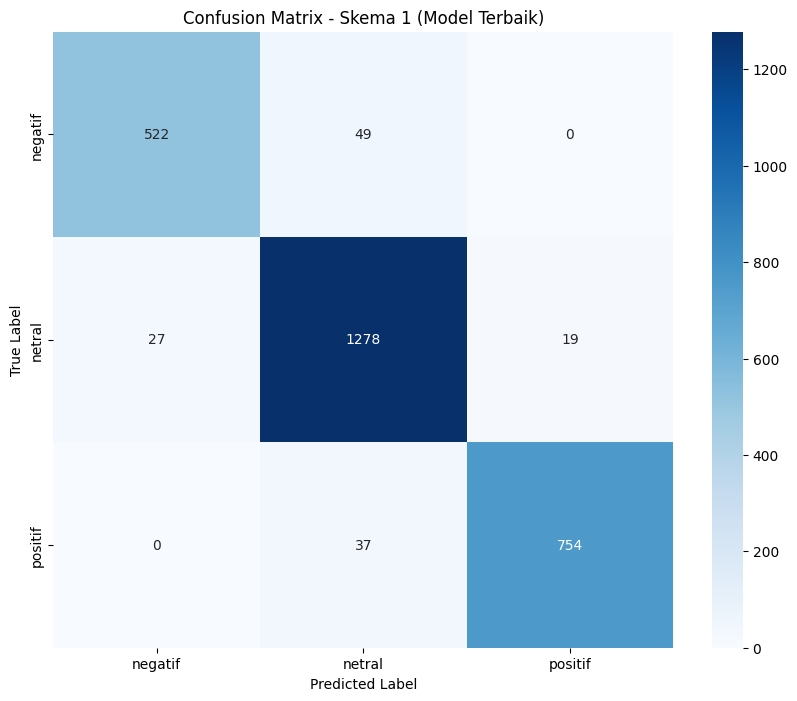

✅ Confusion matrix disimpan ke 'confusion_matrix_best.png'


In [61]:
#@title Confusion Matrix

cm = confusion_matrix(y_test_best, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - Skema {best_idx + 1} (Model Terbaik)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrix disimpan ke 'confusion_matrix_best.png'")

In [62]:
#@title Classification Report

print("\nClassification Report:")
print(classification_report(y_test_best, y_pred_classes,
                          target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

     negatif       0.95      0.91      0.93       571
      netral       0.94      0.97      0.95      1324
     positif       0.98      0.95      0.96       791

    accuracy                           0.95      2686
   macro avg       0.95      0.94      0.95      2686
weighted avg       0.95      0.95      0.95      2686



## **MENYIMPAN** **MODEL** TERBAIK

In [63]:
# ============================================================================
# 8. MENYIMPAN MODEL TERBAIK
# ============================================================================

print("\n" + "="*80)
print("MENYIMPAN MODEL DAN KOMPONEN")
print("="*80)


MENYIMPAN MODEL DAN KOMPONEN


In [64]:
#@title Simpan model terbaik
best_model.save('best_sentiment_model.h5')
print("✅ Model terbaik disimpan ke 'best_sentiment_model.h5'")

✅ Model terbaik disimpan ke 'best_sentiment_model.h5'


In [65]:
#@title Simpan tokenizer
import pickle

if best_idx == 0:
    tokenizer_best = tokenizer_1
elif best_idx == 1:
    tokenizer_best = tfidf_vectorizer
else:
    tokenizer_best = tokenizer_3

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer_best, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("✅ Tokenizer disimpan ke 'tokenizer.pickle'")

✅ Tokenizer disimpan ke 'tokenizer.pickle'


In [66]:
#@title Simpan label encoder
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("✅ Label encoder disimpan ke 'label_encoder.pickle'")

✅ Label encoder disimpan ke 'label_encoder.pickle'


In [67]:
#@title Simpan info skema terbaik
best_info = {
    'best_skema': best_idx + 1,
    'test_accuracy': [test_acc_1, test_acc_2, test_acc_3][best_idx],
    'train_accuracy': [train_acc_1, train_acc_2, train_acc_3][best_idx],
    'max_len': max_len,
    'max_words': max_words
}

with open('model_info.pickle', 'wb') as handle:
    pickle.dump(best_info, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("✅ Informasi model disimpan ke 'model_info.pickle'")

print("\n" + "="*80)
print("PROSES PELATIHAN SELESAI!")
print("="*80)

✅ Informasi model disimpan ke 'model_info.pickle'

PROSES PELATIHAN SELESAI!
